### Training with context==512

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importing Necessary Librarires
import numpy as np
import keras
import gzip
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512, 300)          362400    
                                                                 
 dropout (Dropout)           (None, 512, 300)          0         
                                                                 
 lstm_1 (LSTM)               (None, 512, 100)          160400    
                                                                 
 dropout_1 (Dropout)         (None, 512, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 553,051
Trainable params: 553,051
Non-trai

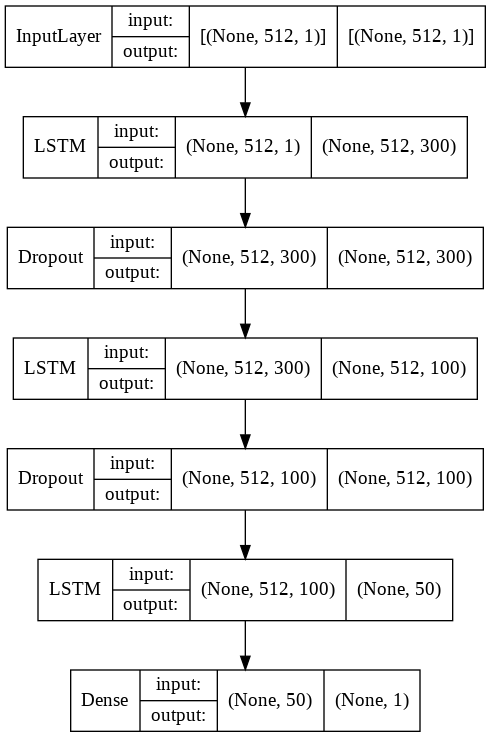

In [2]:
context=512
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (context, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh'))
model.add(Dense(units = 1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [7]:
file_names="/content/drive/MyDrive/00147_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)


In [10]:
data = np.load("/content/drive/MyDrive/00147_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=512
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)

In [11]:
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


3109/3109 [==============================] - 898s 289ms/step - loss: 7.1516e-04


In [12]:
from tensorflow import keras
model = keras.models.load_model('/content/s1.h5')


In [13]:
file_names="/content/drive/MyDrive/00079_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/00079_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=512
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")

file_names="/content/drive/MyDrive/10999_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/10999_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=512
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")


file_names="/content/drive/MyDrive/00009_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/00009_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=512
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")

file_names="/content/drive/MyDrive/00013_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/00013_batched.pkl", allow_pickle=True)
train=data[0][:100000]
context=512
train_gen = TimeseriesGenerator(train ,train, length=context, batch_size=32)
model.fit_generator(train_gen, epochs=1, verbose=1)
model.save("/content/s1.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


3109/3109 [==============================] - 902s 289ms/step - loss: 0.0157


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


3109/3109 [==============================] - 895s 288ms/step - loss: 481.8730


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


3109/3109 [==============================] - 895s 288ms/step - loss: 0.0096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


3109/3109 [==============================] - 897s 288ms/step - loss: 0.0043


In [14]:
model.save("/content/drive/MyDrive/s512.h5")

### Testing with Context==512

In [2]:
# Imports
import os
import gzip
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras import models 
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import load_model
model=load_model("/content/drive/MyDrive/s512.h5")

In [3]:
file_names="/content/drive/MyDrive/10951_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/10951_batched.pkl", allow_pickle=True)
context=512
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)



742/742 [==============================] - 79s 100ms/step


In [4]:
#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)




In [5]:
print(MAE)

[0.0512549]


In [11]:
file_names="/content/drive/MyDrive/07930_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/07930_batched.pkl", allow_pickle=True)
context=512
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)



742/742 [==============================] - 74s 100ms/step


In [12]:
#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)
print(MAE)



[0.05791167]


In [13]:
file_names="/content/drive/MyDrive/08048_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/08048_batched.pkl", allow_pickle=True)
context=512
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)

#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)
print(MAE)



742/742 [==============================] - 74s 100ms/step
[0.12908275]


In [15]:
file_names="/content/drive/MyDrive/08622_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/08622_batched.pkl", allow_pickle=True)
context=512
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)

#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)
print(MAE)



742/742 [==============================] - 74s 100ms/step
[0.10240477]


In [16]:
file_names="/content/drive/MyDrive/09014_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)
data = np.load("/content/drive/MyDrive/09014_batched.pkl", allow_pickle=True)
context=512
x=np.random.randint(50)
y=np.random.randint(1000000)
test=data[x][y:y+48000]
test_gen = TimeseriesGenerator(
            test, test, length=context, batch_size=64)
pred=model.predict(test_gen,verbose=1)

#Mean Absolute error
abs_error=0
for i in range (0,len(pred)):
  abs_error+=abs(pred[i]-test[i+context])

MAE=abs_error/len(pred)
print(MAE)



742/742 [==============================] - 74s 100ms/step
[0.08610365]
